In [76]:
# Step 1: Import required libraries

import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris

In [77]:
# Load the dataset

iris = load_iris()

In [78]:
# Features (X) and Target (y)
X = iris.data   # 4 columns (sepal length, sepal width, petal length, petal width)
y = iris.target # species (0 = setosa, 1 = versicolor, 2 = virginica)

In [79]:
# Show dataset info
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Shape of data:", X.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)


In [80]:
# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# First 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (120, 4)
Test set size: (30, 4)


In [82]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=200)

# Train (fit) model
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
# Example: Predict species for a new flower
sample = [[5.1, 3.5, 1.4, 0.2]]  # sepal length, sepal width, petal length, petal width
predicted_class = model.predict(sample)
print("Predicted Species:", iris.target_names[predicted_class][0])


Predicted Species: setosa


In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9733333333333334


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable prettier plots
sns.set(style="whitegrid")


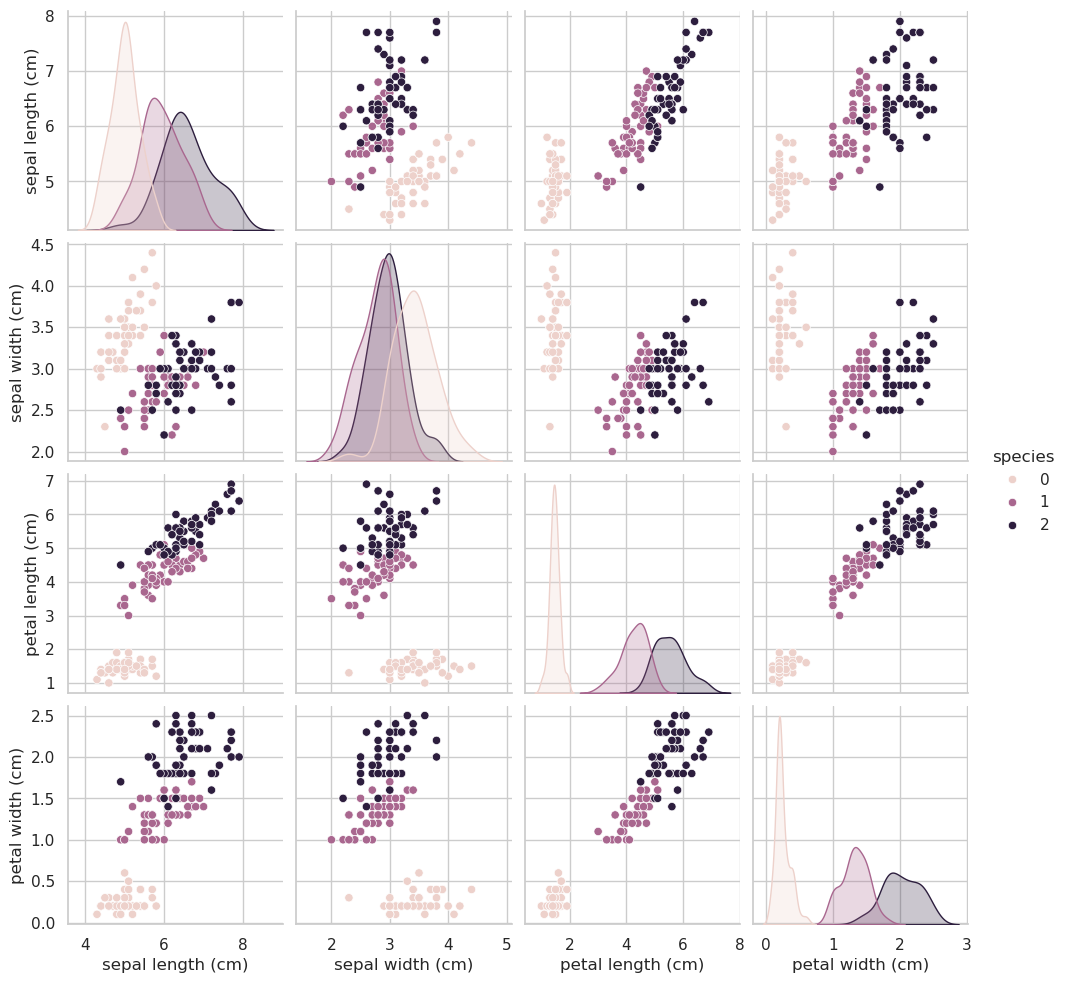

In [87]:
# Pairplot: scatterplots between every pair of features
sns.pairplot(df, hue='species',diag_kind='kde')
plt.show()


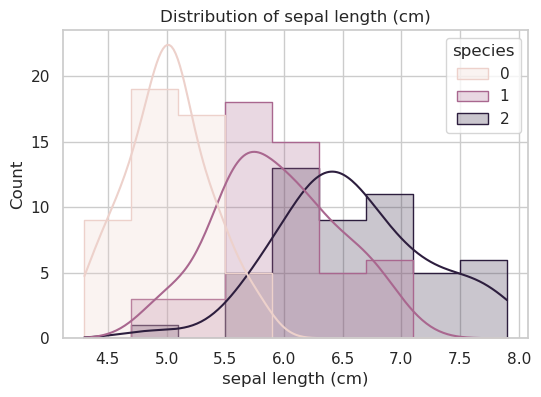

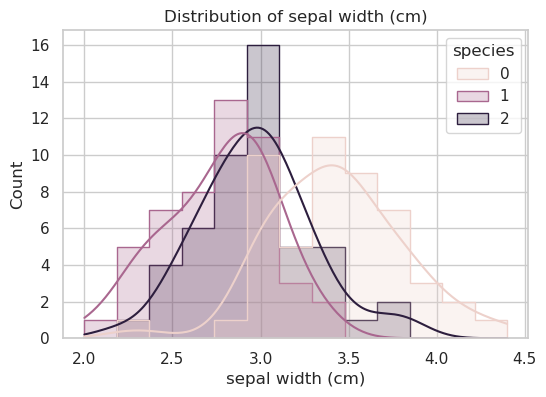

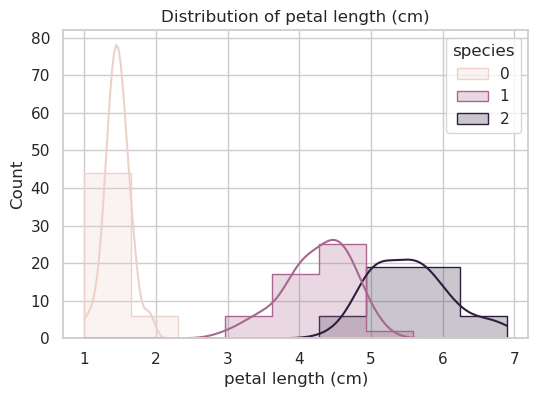

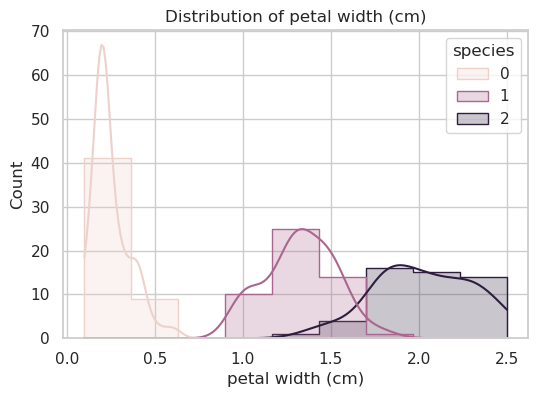

In [88]:
# Distribution plots for each feature
df_features = iris.feature_names
for feature in df_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue="species", kde=True, element="step")
    plt.title(f"Distribution of {feature}")
plt.show()


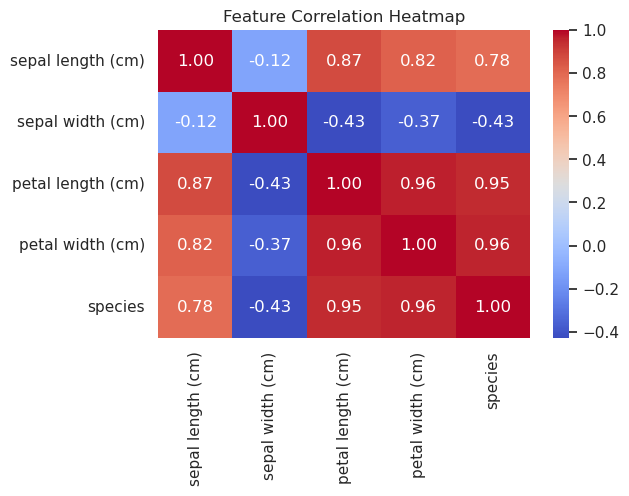

In [89]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


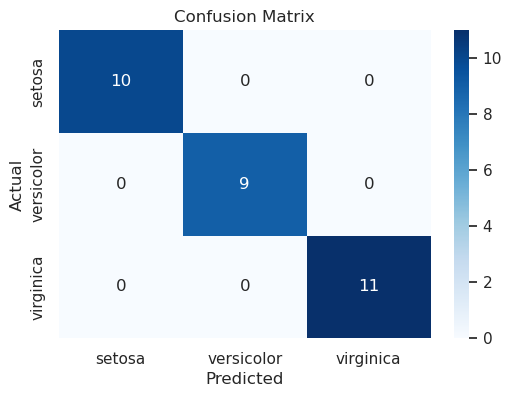

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 
